In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

In [2]:
df = pd.read_csv('world_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 54 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     171 non-null    object 
 1   Population (2020)                                           171 non-null    int64  
 2   Yearly Change                                               171 non-null    float64
 3   Net Change                                                  171 non-null    int64  
 4   Density (P/Km²)                                             171 non-null    int64  
 5   Land Area (Km²)                                             171 non-null    int64  
 6   Migrants (net)                                              171 non-null    int64  
 7   Fert. Rate                                                  171 non-null    float64
 8   

In [4]:
df = df.dropna(axis=1)

In [5]:
df = df.rename(columns={'Population (2020)':'Pop.', 'Male Height in Cm' : 'Male Height(cm)', 
                        'Female Height in Cm' : 'Female Height(cm)', 
                        'GDP: Gross domestic product (million current US$)' : 'GDP ($)', 
                        'GDP growth rate (annual %, const. 2005 prices)' : 'GDP growth', 
                        'GDP per capita (current US$)' : 'GDP per capita($)', 
                        'Employment: Agriculture (% of employed)' : 'Agriculture(%)', 
                        'Employment: Industry (% of employed)': 'Industry(%)', 
                        'Employment: Services (% of employed)': 'Services(%)', 
                        'Unemployment (% of labour force)' : 'Unemployed(%)'})

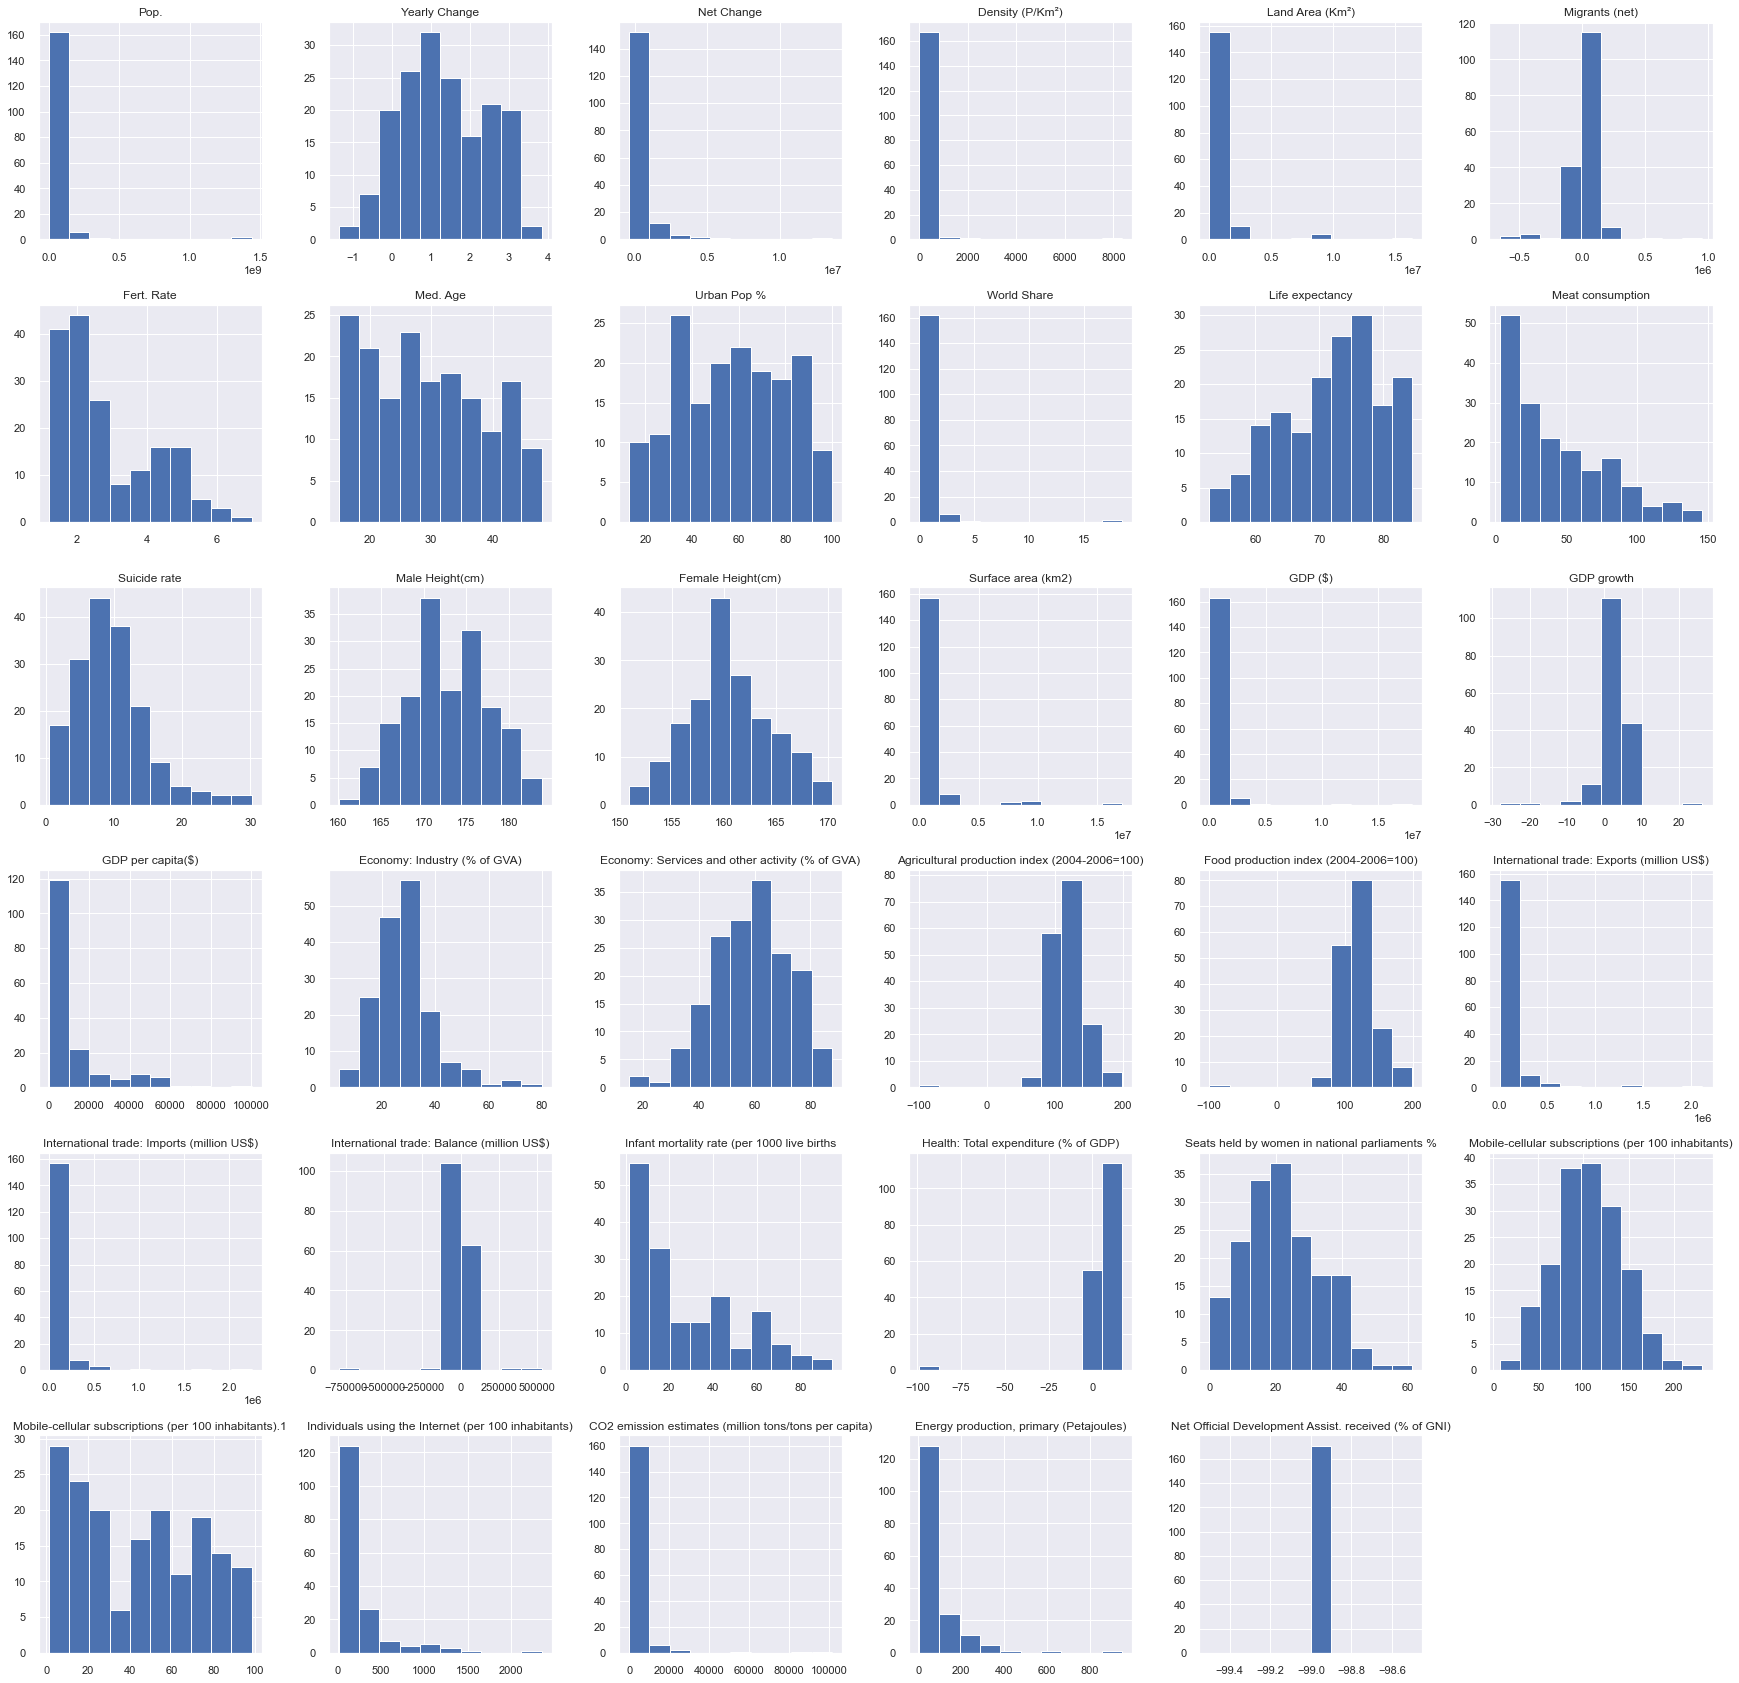

In [6]:
sns.set_theme(style='darkgrid')
df.hist(figsize=(30,30))
plt.show()

<AxesSubplot:>

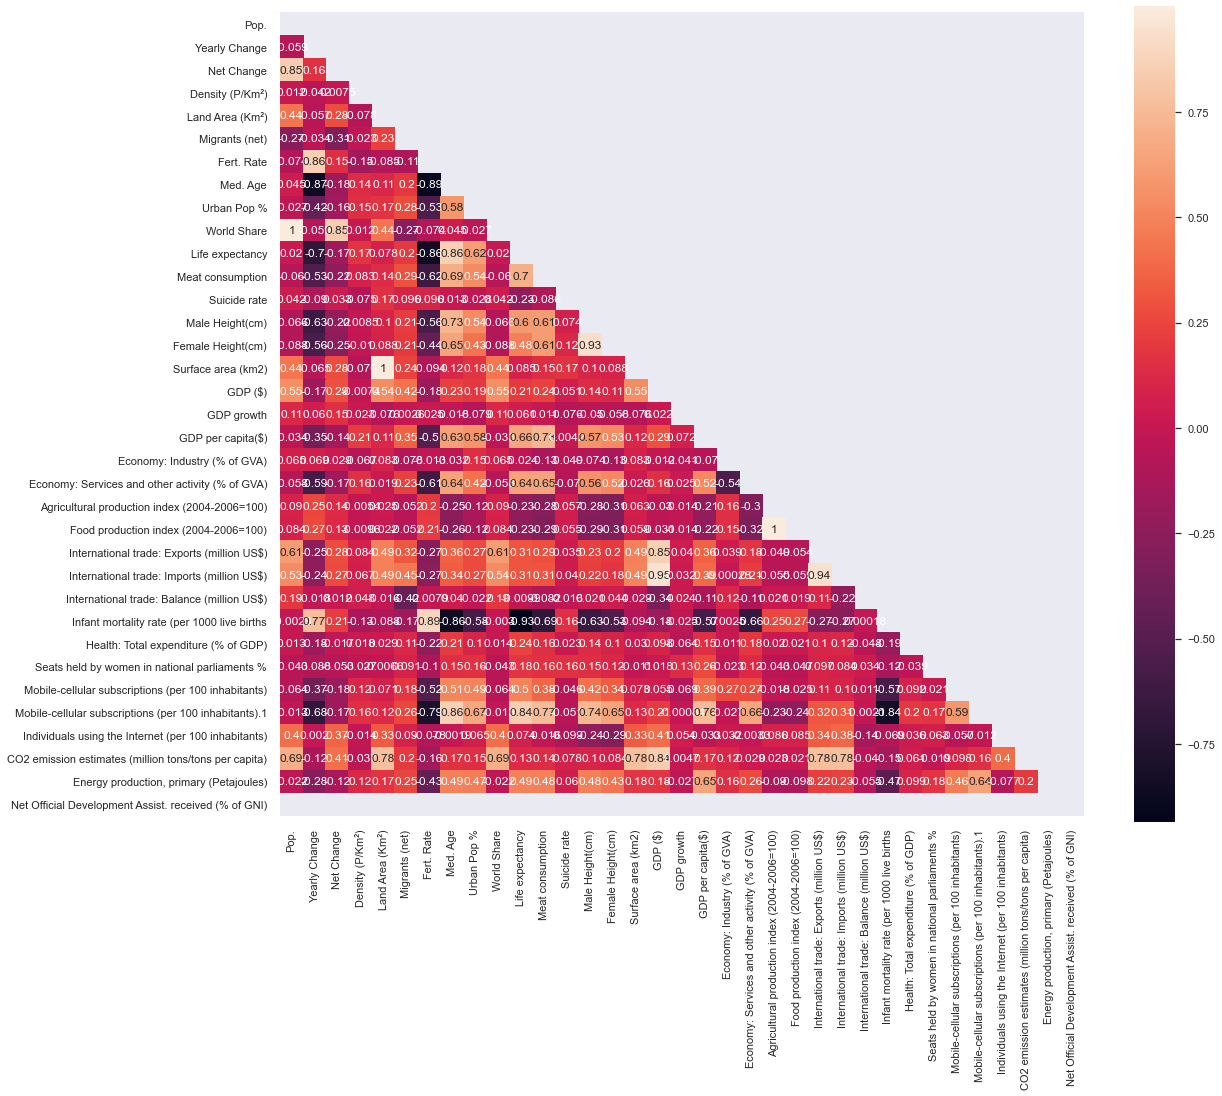

In [7]:
sns.set(rc = {'figure.figsize':(18,15)})
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask, square=True)

In [8]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
X = df.drop(to_drop, axis=1)

<AxesSubplot:>

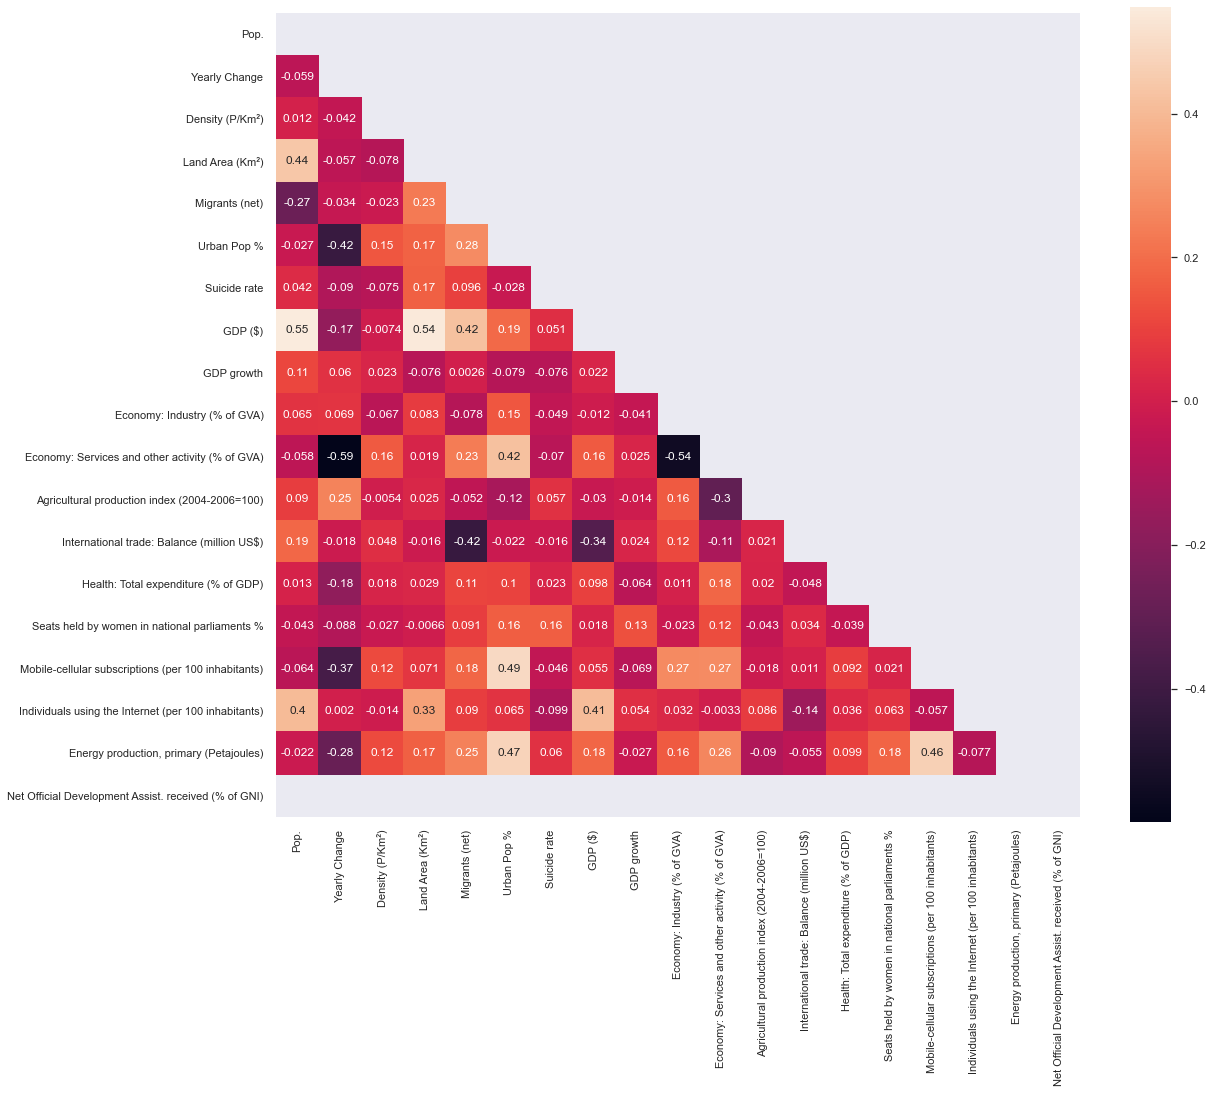

In [9]:
sns.set(rc = {'figure.figsize':(18,15)})
mask = np.triu(np.ones_like(X.corr()))
sns.heatmap(X.corr(), annot=True, mask=mask, square=True)

In [10]:
X = X.drop(columns=['Country', 'ISO'])
X = scale(X)

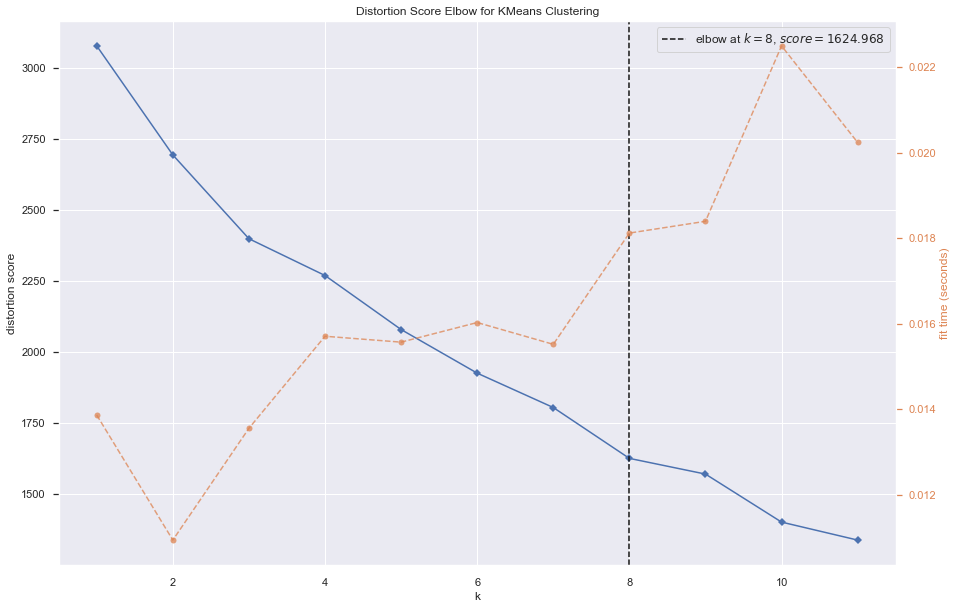

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
plt.figure(figsize=(15,10))
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

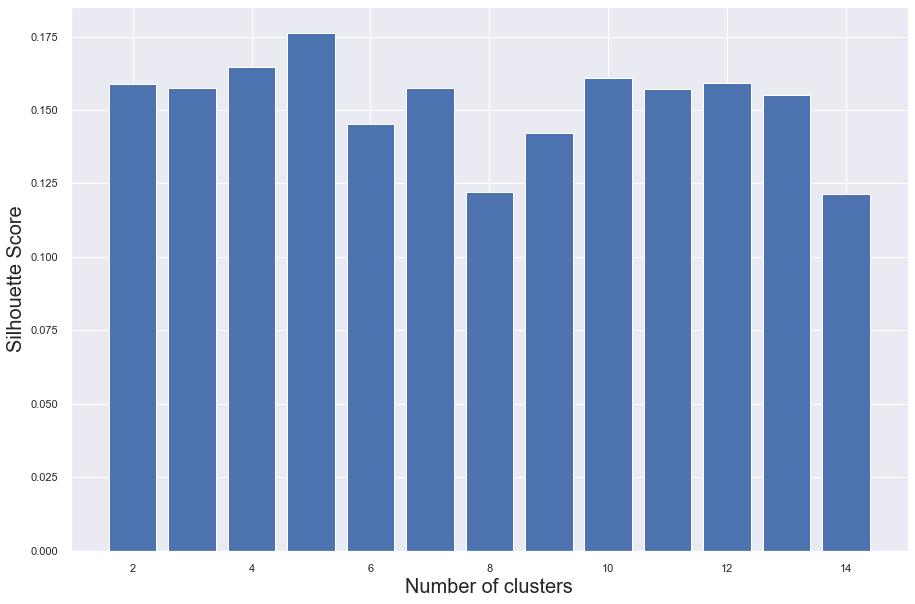

In [12]:
silhouette_scores = [] 
plt.figure(figsize=(15,10))
for n_cluster in range(2, 15):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster, random_state = 123).fit_predict(X))) 
    
# Plotting a bar graph to compare the results 
k = list(range(2,15))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Score', fontsize = 20) 
plt.show()

In [13]:
data = df.drop(columns=['Country', 'ISO'])

In [14]:
data.shape

(171, 35)

In [15]:
data = scale(data)

In [16]:
pca = PCA(n_components=data.shape[1])

In [17]:
pca.fit(data)

PCA(n_components=35)

In [18]:
print(pca.explained_variance_ratio_)

[2.92560603e-01 1.74560339e-01 6.77573825e-02 6.21331071e-02
 4.92483428e-02 4.08921737e-02 3.95007145e-02 3.22235685e-02
 3.03065254e-02 2.78536004e-02 2.67820249e-02 2.58901576e-02
 2.32502727e-02 1.62816585e-02 1.57164223e-02 1.44673312e-02
 1.22611684e-02 1.03859177e-02 8.87252717e-03 6.26823581e-03
 4.93605252e-03 4.37817940e-03 3.21012313e-03 2.78823585e-03
 1.90478817e-03 1.56521532e-03 1.31565482e-03 1.25562819e-03
 7.23347084e-04 5.44428201e-04 1.18967080e-04 4.72812081e-05
 2.58119292e-08 3.78598173e-14 1.68843890e-33]


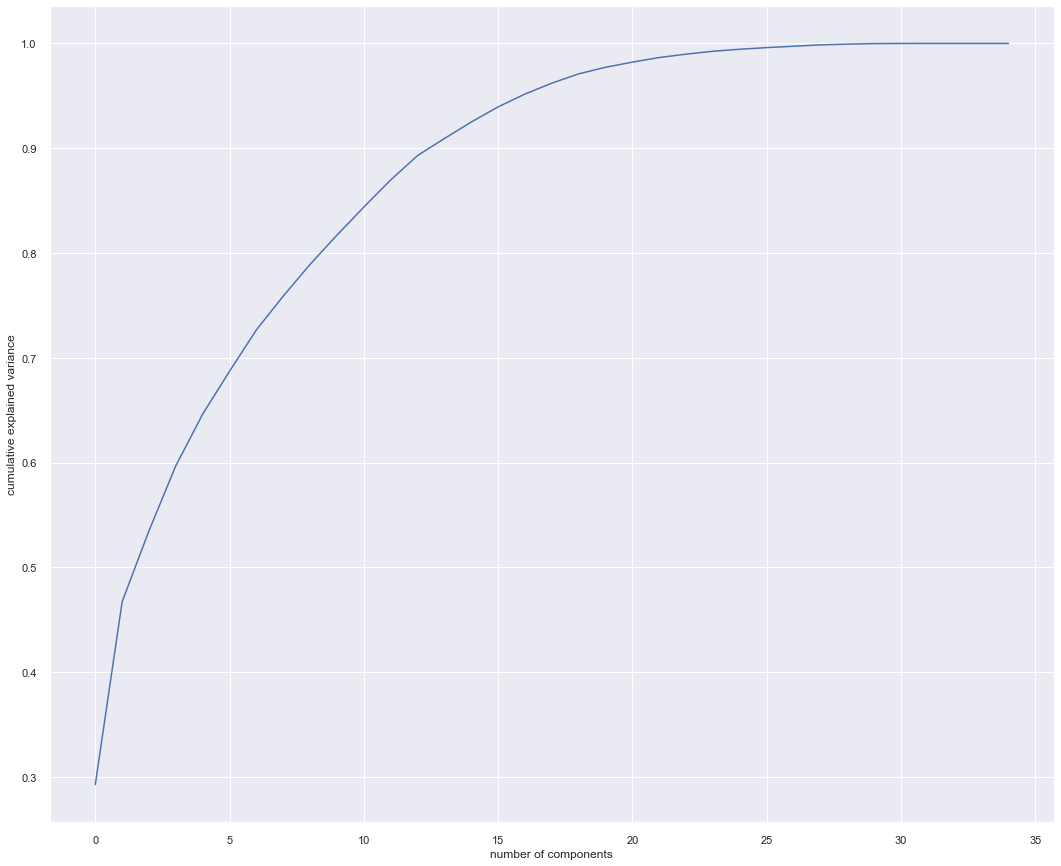

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [20]:
pca = PCA(n_components=5)
principal = pca.fit_transform(data)

In [21]:
num_clusters = [1,2,3,4,5,6,7,8,9,10]
kmeans_list = [KMeans(n_clusters = i, random_state=123) for i in num_clusters]
scores = [kmeans_list[i-1].fit(principal).inertia_ for i in num_clusters]

/Users/daniel.simpson/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Elbow test')

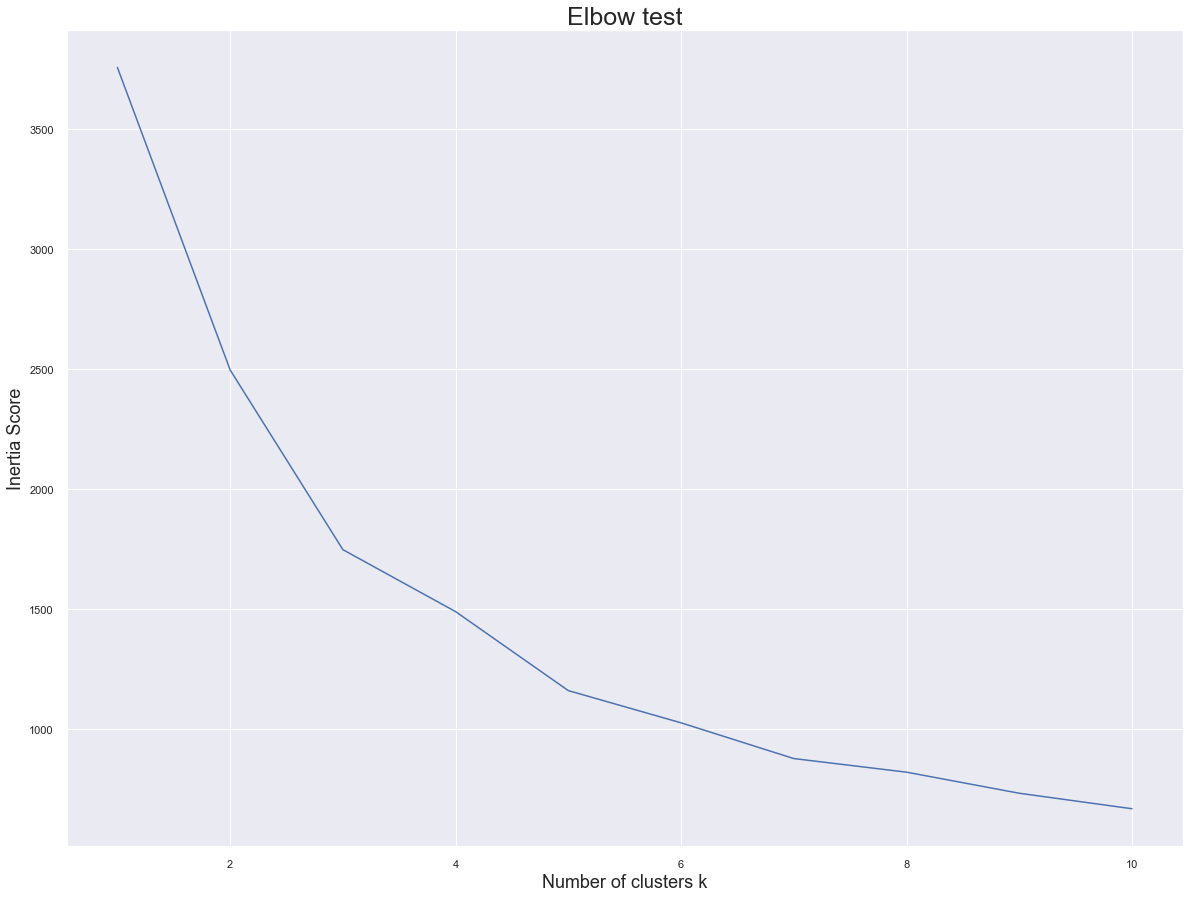

In [22]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,15)})
sns.lineplot(num_clusters, scores)
plt.xlabel("Number of clusters k", fontsize=18)
plt.ylabel("Inertia Score", fontsize=18)
plt.title("Elbow test", fontsize=25)

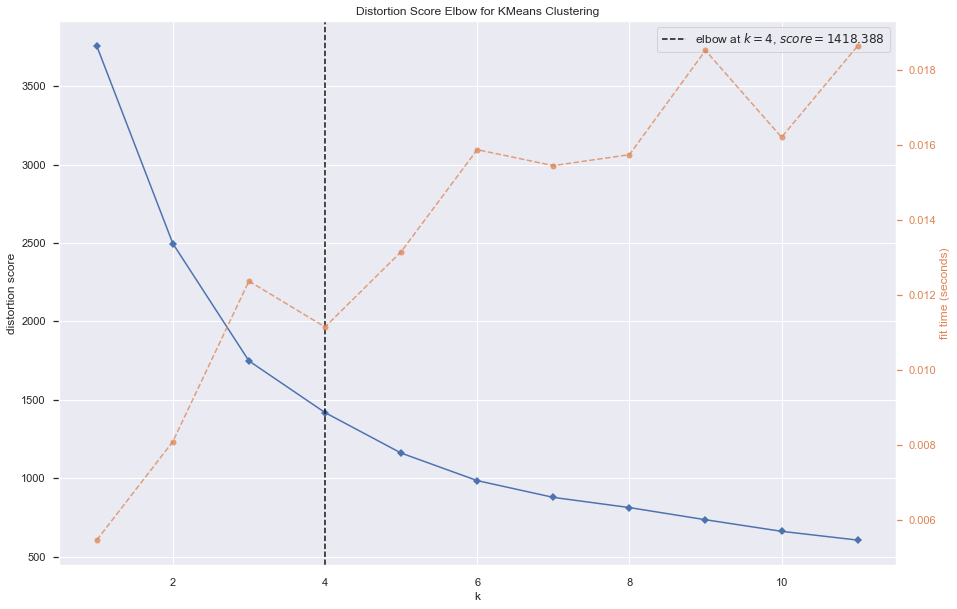

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
plt.figure(figsize=(15,10))
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(principal)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

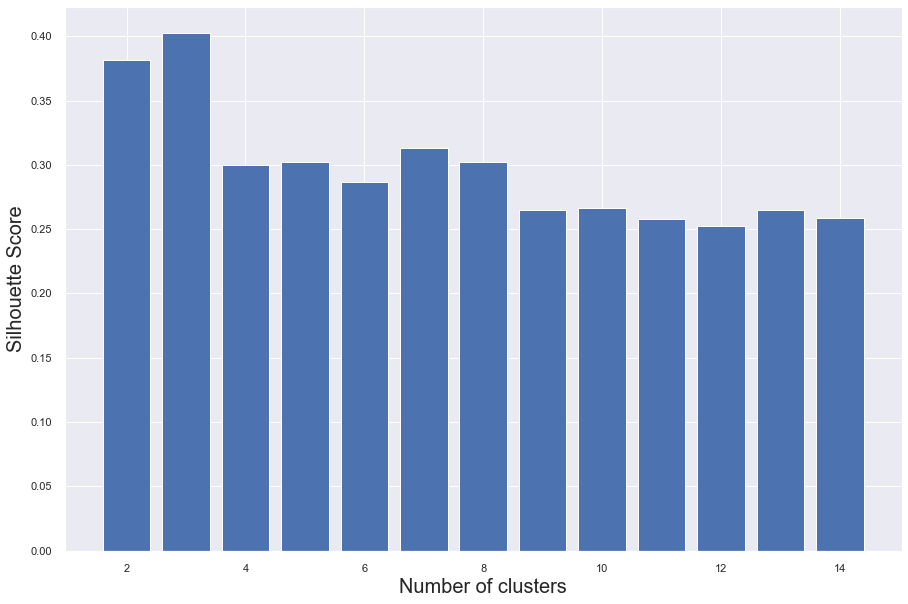

In [24]:
silhouette_scores = [] 
plt.figure(figsize=(15,10))
for n_cluster in range(2, 15):
    silhouette_scores.append( 
        silhouette_score(principal, KMeans(n_clusters = n_cluster, random_state = 123).fit_predict(principal))) 
    
# Plotting a bar graph to compare the results 
k = list(range(2,15))
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silhouette Score', fontsize = 20) 
plt.show() 

In [25]:
kmeans_pca = KMeans(n_clusters = 3, random_state=123)
kmeans_pca.fit(principal)
labels = kmeans_pca.labels_
df['kmeans-3'] = labels
df.head()

Country      Pop.  Yearly Change  Net Change  Density (P/Km²)  \
0          Afghanistan  38928346           2.33      886592               60   
1              Algeria  43851044           1.85      797990               18   
2               Angola  32866272           3.27     1040977               26   
3  Antigua and Barbuda     97929           0.84         811              223   
4            Argentina  45195774           0.93      415097               17   

   Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  ...  \
0           652860          -62920         4.6        18         25.0  ...   
1          2381740          -10000         3.1        29         73.0  ...   
2          1246700            6413         5.6        17         67.0  ...   
3              440               0         2.0        34         26.0  ...   
4          2736690            4800         2.3        32         93.0  ...   

   Infant mortality rate (per 1000 live births  \
0                                         68.6   
1                                         27.7   
2                                         65.4   
3                                          9.1   
4                                         13.7   

  Health: Total expenditure (% of GDP)  \
0                                  8.2   
1                                  7.2   
2                                  3.3   
3                                  5.5   
4                                  4.8   

   Seats held by women in national parliaments %  \
0                                           27.7   
1                                           31.6   
2                                           38.2   
3                                           11.1   
4                                           38.9   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6     
1                                              113.0     
2                                               60.8     
3                                              137.2     
4                                              143.9     

   Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                8.3       
1                                               38.2       
2                                               12.4       
3                                               65.2       
4                                               69.4       

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 42      
1                                                135      
2                                                146      
3                                                 55      
4                                                256      

   CO2 emission estimates (million tons/tons per capita)  \
0                                                 63       
1                                               5900       
2                                               3902       
3                                                -99       
4                                               3167       

   Energy production, primary (Petajoules)  \
0                                        5   
1                                       55   
2                                       25   
3                                       84   
4                                       85   

   Net Official Development Assist. received (% of GNI)  kmeans-3  
0                                                -99            0  
1                                                -99            0  
2                                                -99            0  
3                                                -99            1  
4                                                -99            1  

[5 rows x 38 columns]

In [26]:
from itertools import product

eps_values = np.arange(0.5,6,0.25) # eps values to be investigated
min_samples = np.arange(2,16) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [27]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(principal)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    if len(np.unique(DBS_clustering.labels_)) == 1:
        sil_score.append(0)
    else:
        sil_score.append(silhouette_score(principal, DBS_clustering.labels_)) # THIS WILL BREAK IF ONLY 1 CLUSTER
    # HAS BEEN CREATED DUE TO PARAMETERS SELECTED ABOVE

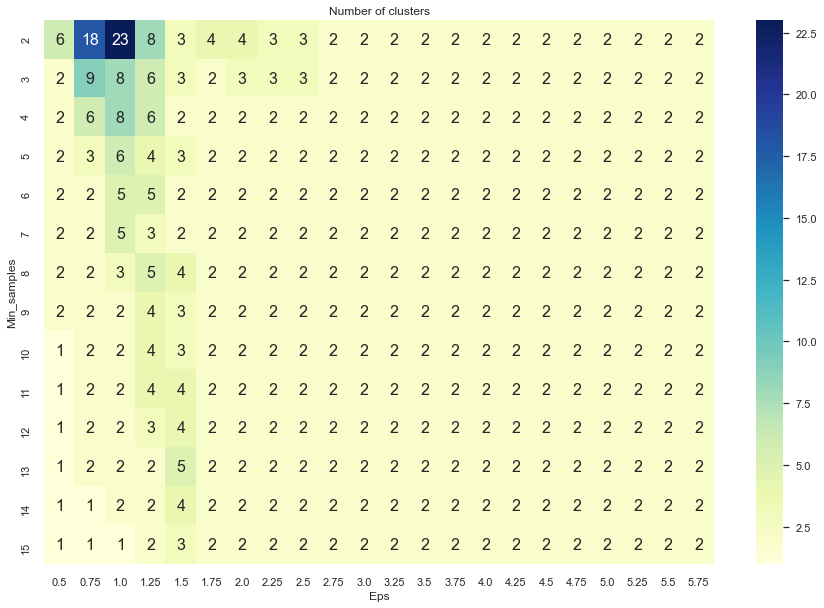

In [28]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

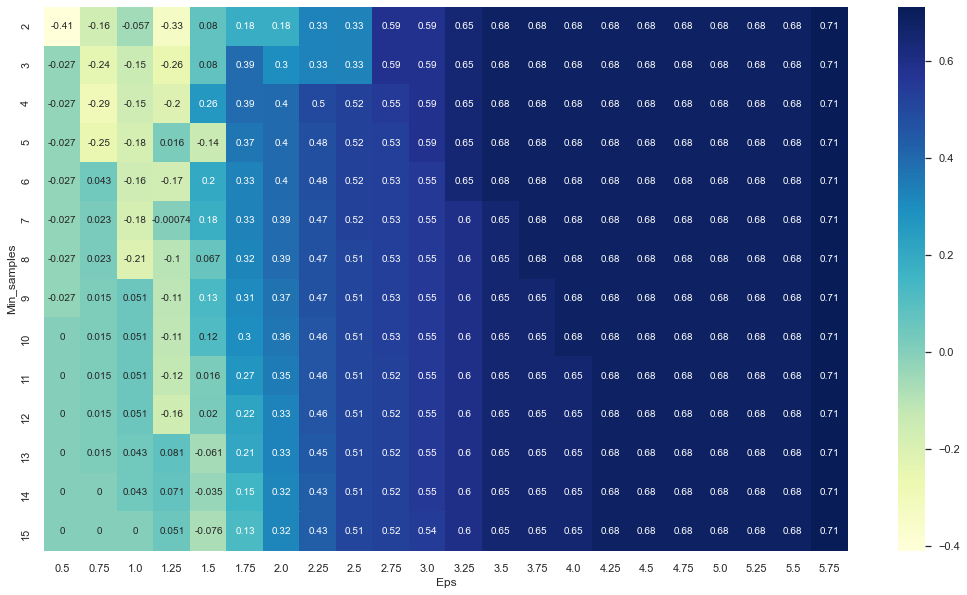

In [29]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [30]:
DBScan = DBSCAN(eps=0.7, min_samples=12).fit(principal)
labels = DBScan.labels_
df['DBScan'] = labels
df.head()

Country      Pop.  Yearly Change  Net Change  Density (P/Km²)  \
0          Afghanistan  38928346           2.33      886592               60   
1              Algeria  43851044           1.85      797990               18   
2               Angola  32866272           3.27     1040977               26   
3  Antigua and Barbuda     97929           0.84         811              223   
4            Argentina  45195774           0.93      415097               17   

   Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  ...  \
0           652860          -62920         4.6        18         25.0  ...   
1          2381740          -10000         3.1        29         73.0  ...   
2          1246700            6413         5.6        17         67.0  ...   
3              440               0         2.0        34         26.0  ...   
4          2736690            4800         2.3        32         93.0  ...   

   Health: Total expenditure (% of GDP)  \
0                                   8.2   
1                                   7.2   
2                                   3.3   
3                                   5.5   
4                                   4.8   

  Seats held by women in national parliaments %  \
0                                          27.7   
1                                          31.6   
2                                          38.2   
3                                          11.1   
4                                          38.9   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6     
1                                              113.0     
2                                               60.8     
3                                              137.2     
4                                              143.9     

   Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                8.3       
1                                               38.2       
2                                               12.4       
3                                               65.2       
4                                               69.4       

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 42      
1                                                135      
2                                                146      
3                                                 55      
4                                                256      

   CO2 emission estimates (million tons/tons per capita)  \
0                                                 63       
1                                               5900       
2                                               3902       
3                                                -99       
4                                               3167       

   Energy production, primary (Petajoules)  \
0                                        5   
1                                       55   
2                                       25   
3                                       84   
4                                       85   

   Net Official Development Assist. received (% of GNI)  kmeans-3  DBScan  
0                                                -99            0      -1  
1                                                -99            0      -1  
2                                                -99            0      -1  
3                                                -99            1      -1  
4                                                -99            1      -1  

[5 rows x 39 columns]

In [31]:
import plotly.graph_objs as go
from plotly.offline import iplot

# define a data object and a colorscale
data = dict(type='choropleth',
            locations=df['Country'],
            locationmode='country names',
            z=df['kmeans-3'],
            text=df['Country'],
           )

# define a layout object
layout = dict(title='Country Clusters',
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

In [32]:
import plotly.graph_objs as go
from plotly.offline import iplot

# define a data object and a colorscale
data = dict(type='choropleth',
            locations=df['Country'],
            locationmode='country names',
            z=df['DBScan'],
            text=df['Country'],
           )

# define a layout object
layout = dict(title='Country Clusters',
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

In [34]:
def visualize_clusters(df, x, cluster):
    sns.displot(df[df['kmeans-3'] == cluster], x = df[df['kmeans-3'] == cluster][x])
    plt.title('Cluster number ' + str(cluster) + ' ' + str(x) + ' distribution')
    return plt.show()

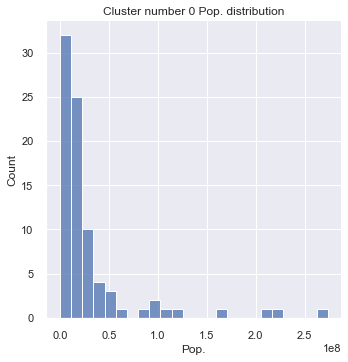

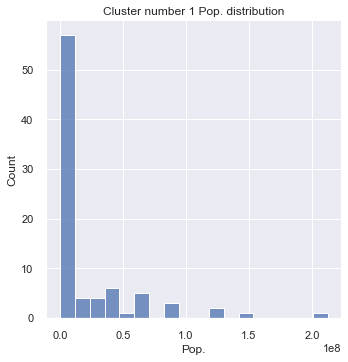

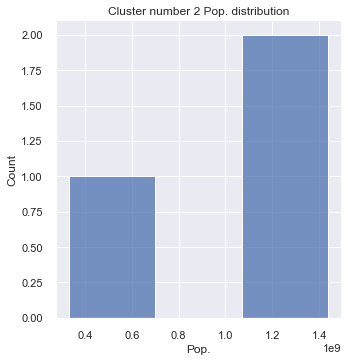

In [35]:
for i in range(0,3):
    visualize_clusters(df, cluster=i, x='Pop.')

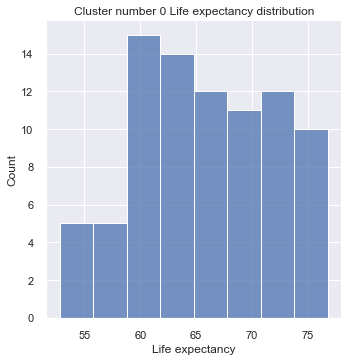

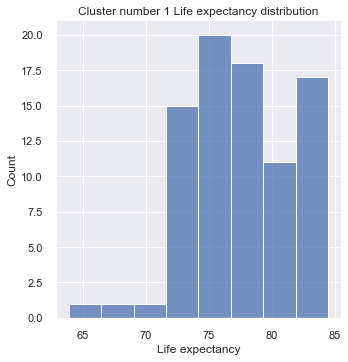

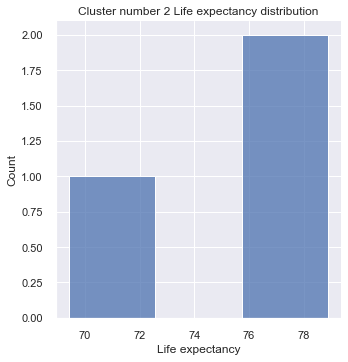

In [36]:
for i in range(0,3):
    visualize_clusters(df, cluster=i, x='Life expectancy')

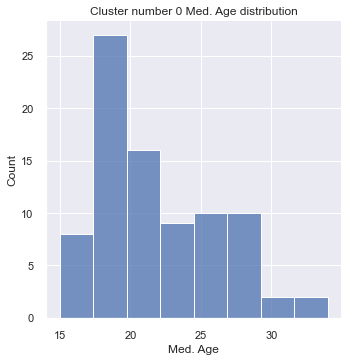

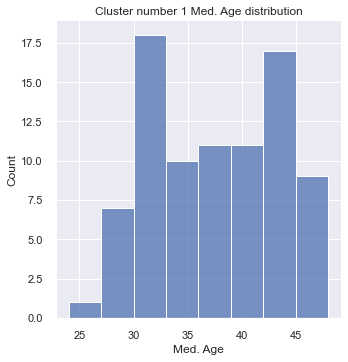

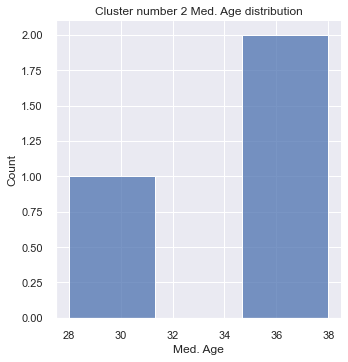

In [37]:
for i in range(0,3):
    visualize_clusters(df, cluster=i, x='Med. Age')

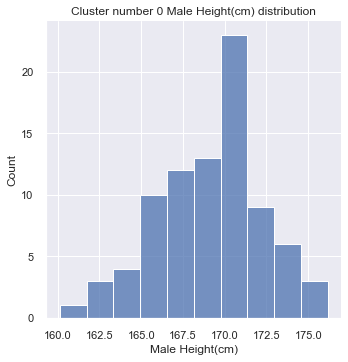

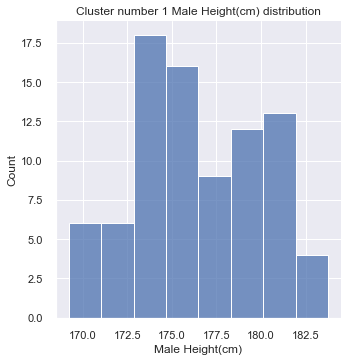

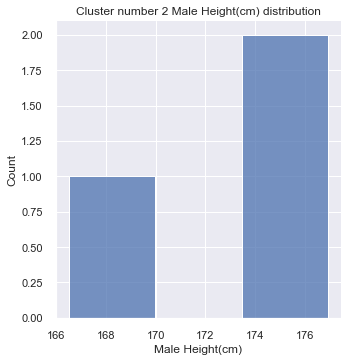

In [38]:
for i in range(0,3):
    visualize_clusters(df, cluster=i, x='Male Height(cm)')

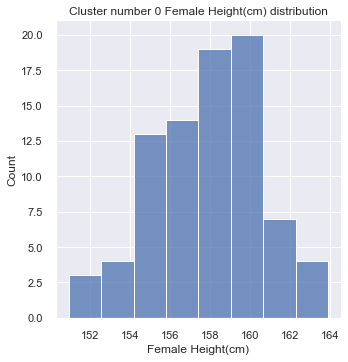

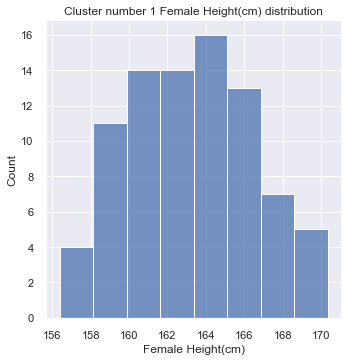

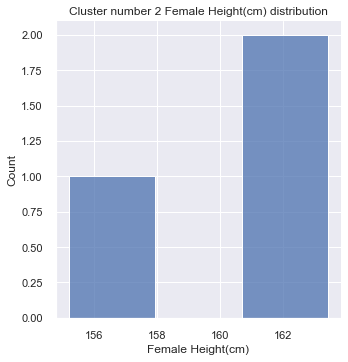

In [39]:
for i in range(0,3):
    visualize_clusters(df, cluster=i, x='Female Height(cm)')

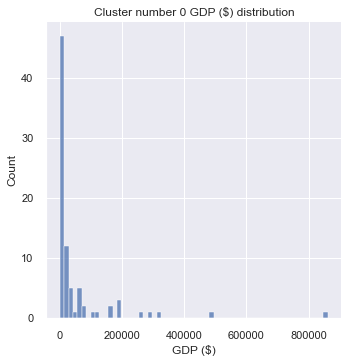

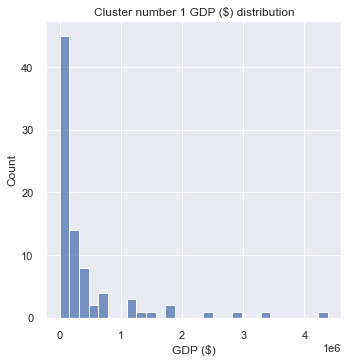

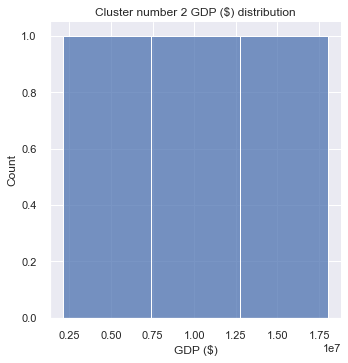

In [40]:
for i in range(0,3):
    visualize_clusters(df, cluster=i, x='GDP ($)')

In [41]:
df['kmeans-3'].value_counts()

0    84
1    84
2     3
Name: kmeans-3, dtype: int64

In [42]:
df

Country      Pop.  Yearly Change  Net Change  \
0                          Afghanistan  38928346           2.33      886592   
1                              Algeria  43851044           1.85      797990   
2                               Angola  32866272           3.27     1040977   
3                  Antigua and Barbuda     97929           0.84         811   
4                            Argentina  45195774           0.93      415097   
..                                 ...       ...            ...         ...   
166  Venezuela, Bolivarian Republic of  28435940          -0.28      -79889   
167                           Viet Nam  97338579           0.91      876473   
168                              Yemen  29825964           2.28      664042   
169                             Zambia  18383955           2.93      522925   
170                           Zimbabwe  14862924           1.48      217456   

     Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  \
0                 60           652860          -62920         4.6        18   
1                 18          2381740          -10000         3.1        29   
2                 26          1246700            6413         5.6        17   
3                223              440               0         2.0        34   
4                 17          2736690            4800         2.3        32   
..               ...              ...             ...         ...       ...   
166               32           882050         -653249         2.3        30   
167              314           310070          -80000         2.1        32   
168               56           527970          -30000         3.8        20   
169               25           743390           -8000         4.7        18   
170               38           386850         -116858         3.6        19   

     Urban Pop %  ...  Health: Total expenditure (% of GDP)  \
0           25.0  ...                                   8.2   
1           73.0  ...                                   7.2   
2           67.0  ...                                   3.3   
3           26.0  ...                                   5.5   
4           93.0  ...                                   4.8   
..           ...  ...                                   ...   
166         43.0  ...                                   5.3   
167         38.0  ...                                   7.1   
168         38.0  ...                                   5.6   
169         45.0  ...                                   5.0   
170         38.0  ...                                   6.0   

    Seats held by women in national parliaments %  \
0                                            27.7   
1                                            31.6   
2                                            38.2   
3                                            11.1   
4                                            38.9   
..                                            ...   
166                                          22.2   
167                                          26.7   
168                                           0.0   
169                                          18.0   
170                                          32.6   

     Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                                 61.6     
1                                                113.0     
2                                                 60.8     
3                                                137.2     
4                                                143.9     
..                                                 ...     
166                                               93.0     
167                                              130.6     
168                                               68.0     
169                                               74.5     
170                                               84.8     

     Mobile-cellul

In [43]:
data = df.drop(columns=['Country', 'ISO', 'kmeans-3', 'DBScan'])
data = scale(data)
pca = PCA(n_components=15)
principal = pca.fit_transform(data)

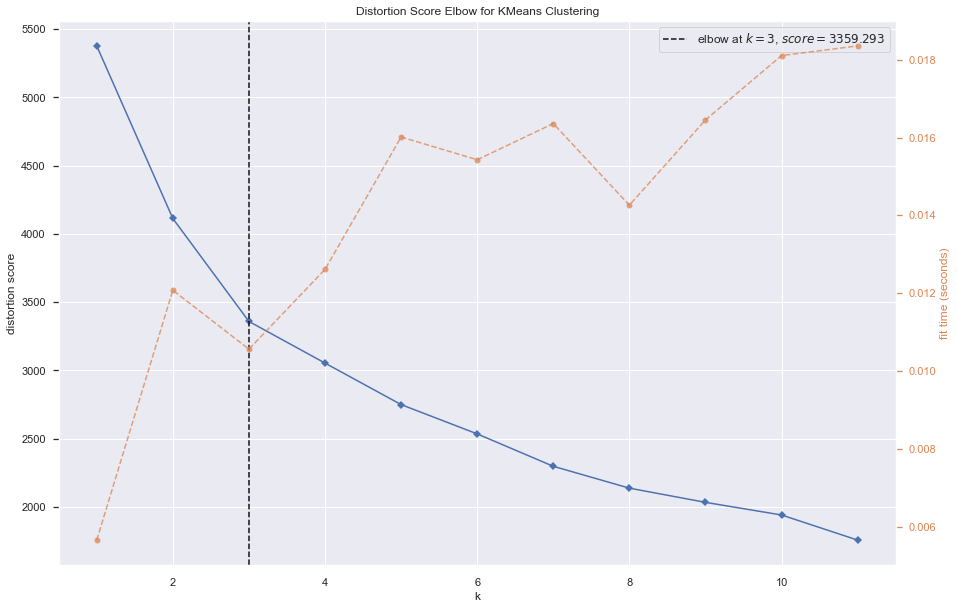

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
plt.figure(figsize=(15,10))
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(principal)        # Fit the data to the visualizer
visualizer.show()

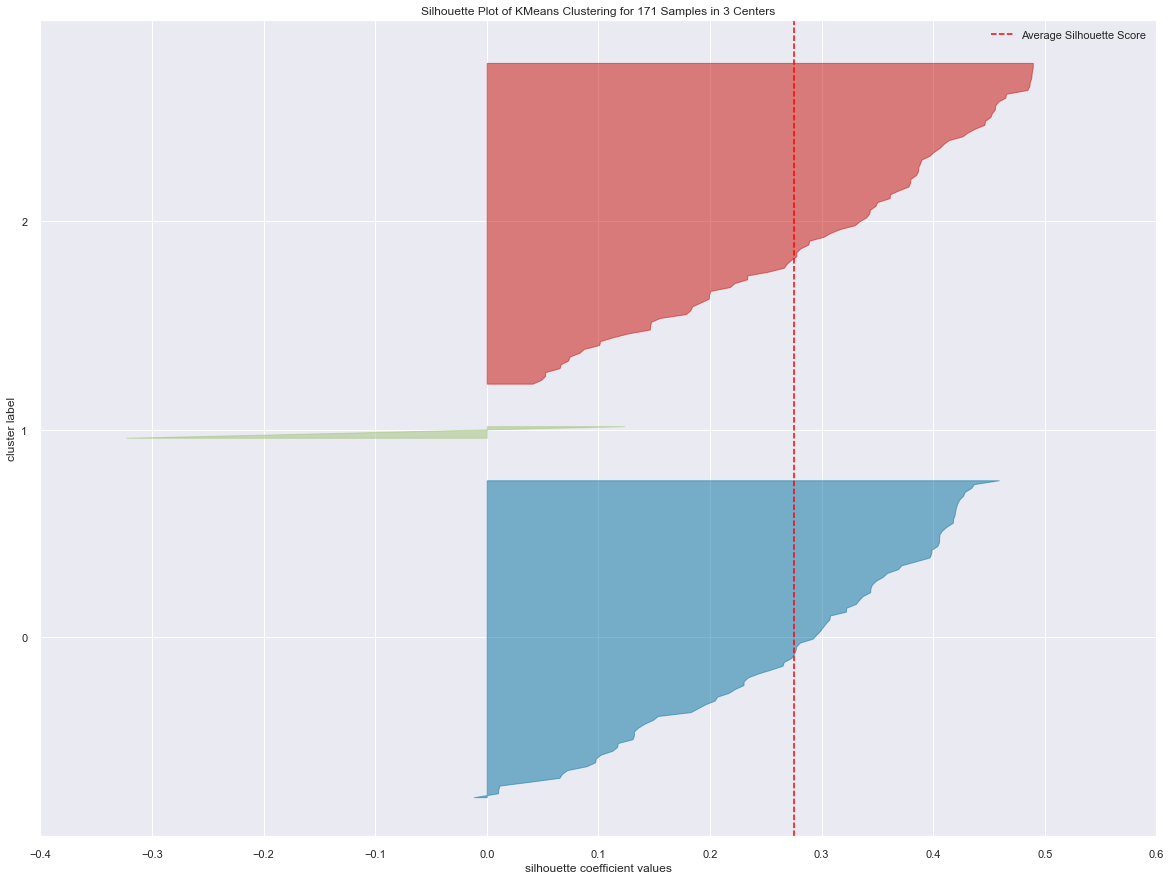

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 171 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(principal)        # Fit the data to the visualizer
visualizer.show()

In [46]:
kmeans_pca = KMeans(n_clusters = 3, random_state=123)
kmeans_pca.fit(principal)
labels = kmeans_pca.labels_
df['kmeans-3(PCA-15)'] = labels
df.head()

Country      Pop.  Yearly Change  Net Change  Density (P/Km²)  \
0          Afghanistan  38928346           2.33      886592               60   
1              Algeria  43851044           1.85      797990               18   
2               Angola  32866272           3.27     1040977               26   
3  Antigua and Barbuda     97929           0.84         811              223   
4            Argentina  45195774           0.93      415097               17   

   Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  ...  \
0           652860          -62920         4.6        18         25.0  ...   
1          2381740          -10000         3.1        29         73.0  ...   
2          1246700            6413         5.6        17         67.0  ...   
3              440               0         2.0        34         26.0  ...   
4          2736690            4800         2.3        32         93.0  ...   

   Seats held by women in national parliaments %  \
0                                           27.7   
1                                           31.6   
2                                           38.2   
3                                           11.1   
4                                           38.9   

  Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6    
1                                              113.0    
2                                               60.8    
3                                              137.2    
4                                              143.9    

   Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                8.3       
1                                               38.2       
2                                               12.4       
3                                               65.2       
4                                               69.4       

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 42      
1                                                135      
2                                                146      
3                                                 55      
4                                                256      

   CO2 emission estimates (million tons/tons per capita)  \
0                                                 63       
1                                               5900       
2                                               3902       
3                                                -99       
4                                               3167       

   Energy production, primary (Petajoules)  \
0                                        5   
1                                       55   
2                                       25   
3                                       84   
4                                       85   

   Net Official Development Assist. received (% of GNI)  kmeans-3  DBScan  \
0                                                -99            0      -1   
1                                                -99            0      -1   
2                                                -99            0      -1   
3                                                -99            1      -1   
4                                                -99            1      -1   

   kmeans-3(PCA-15)  
0                 0  
1                 0  
2                 0  
3                 1  
4                 1  

[5 rows x 40 columns]

In [47]:
df['kmeans-3(PCA-15)'].value_counts()

0    84
1    84
2     3
Name: kmeans-3(PCA-15), dtype: int64

In [49]:
import plotly.graph_objs as go
from plotly.offline import iplot

# define a data object and a colorscale
data = dict(type='choropleth',
            locations=df['Country'],
            locationmode='country names',
            z=df['kmeans-3'],
            text=df['Country'],

           )

# define a layout object
layout = dict(title='Country Clusters (PCA-15)',
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

In [50]:
eps_values = np.arange(0.5,6,0.25) # eps values to be investigated
min_samples = np.arange(2,16) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [51]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(principal)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    if len(np.unique(DBS_clustering.labels_)) == 1:
        sil_score.append(0)
    else:
        sil_score.append(silhouette_score(principal, DBS_clustering.labels_)) # THIS WILL BREAK IF ONLY 1 CLUSTER
    # HAS BEEN CREATED DUE TO PARAMETERS SELECTED ABOVE

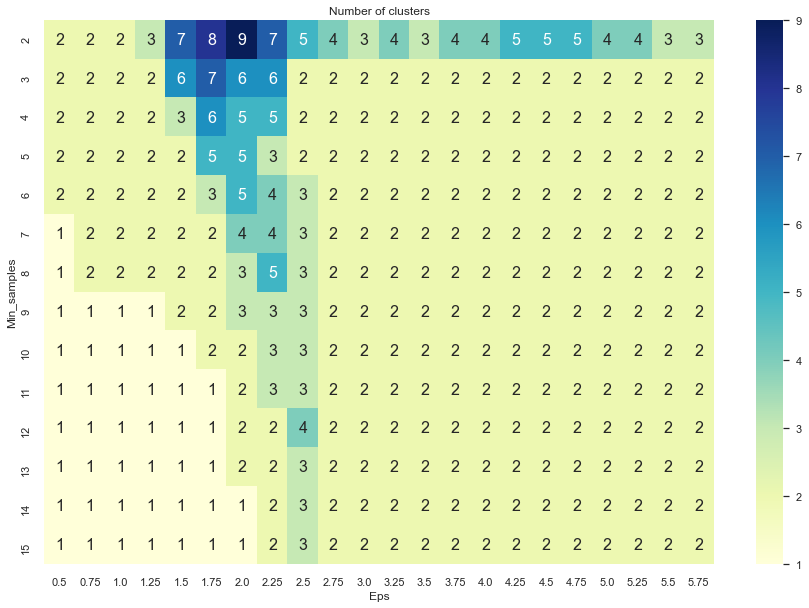

In [52]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

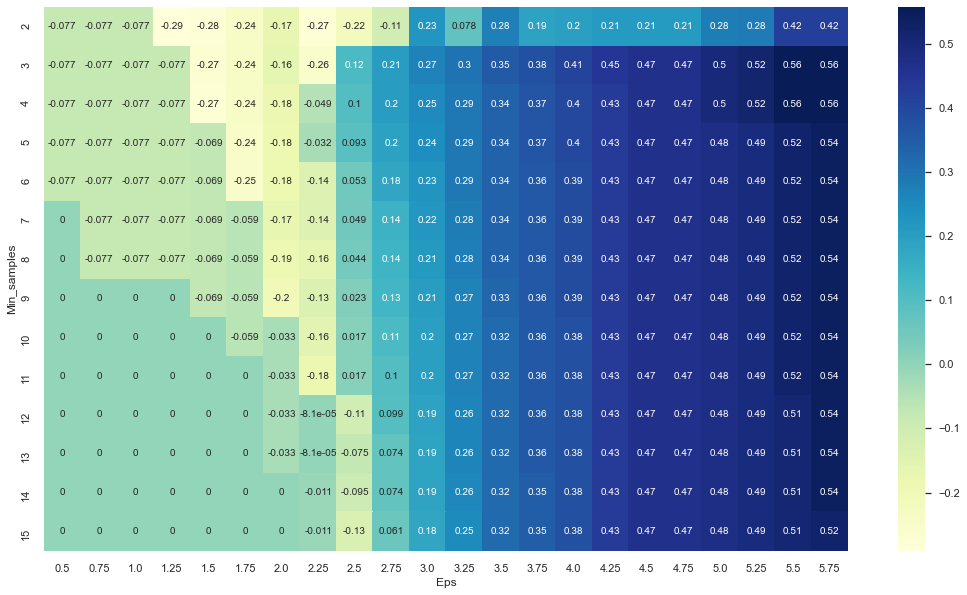

In [53]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [54]:
DBScan = DBSCAN(eps=5.75, min_samples=2).fit(principal)
labels = DBScan.labels_
df['DBScan (PCA-15)'] = labels

Country      Pop.  Yearly Change  Net Change  Density (P/Km²)  \
0          Afghanistan  38928346           2.33      886592               60   
1              Algeria  43851044           1.85      797990               18   
2               Angola  32866272           3.27     1040977               26   
3  Antigua and Barbuda     97929           0.84         811              223   
4            Argentina  45195774           0.93      415097               17   

   Land Area (Km²)  Migrants (net)  Fert. Rate  Med. Age  Urban Pop %  ...  \
0           652860          -62920         4.6        18         25.0  ...   
1          2381740          -10000         3.1        29         73.0  ...   
2          1246700            6413         5.6        17         67.0  ...   
3              440               0         2.0        34         26.0  ...   
4          2736690            4800         2.3        32         93.0  ...   

   Mobile-cellular subscriptions (per 100 inhabitants)  \
0                                               61.6     
1                                              113.0     
2                                               60.8     
3                                              137.2     
4                                              143.9     

  Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                8.3      
1                                               38.2      
2                                               12.4      
3                                               65.2      
4                                               69.4      

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 42      
1                                                135      
2                                                146      
3                                                 55      
4                                                256      

   CO2 emission estimates (million tons/tons per capita)  \
0                                                 63       
1                                               5900       
2                                               3902       
3                                                -99       
4                                               3167       

   Energy production, primary (Petajoules)  \
0                                        5   
1                                       55   
2                                       25   
3                                       84   
4                                       85   

   Net Official Development Assist. received (% of GNI)  kmeans-3  DBScan  \
0                                                -99            0      -1   
1                                                -99            0      -1   
2                                                -99            0      -1   
3                                                -99            1      -1   
4                                                -99            1      -1   

   kmeans-3(PCA-15)  DBScan (PCA-15)  
0                 0                0  
1                 0                0  
2                 0                0  
3                 1                0  
4                 1                0  

[5 rows x 41 columns]

In [55]:
data = dict(type='choropleth',
            locations=df['Country'],
            locationmode='country names',
            z=df['DBScan (PCA-15)'],
            text=df['Country'],

           )

# define a layout object
layout = dict(title='Country Clusters (PCA-15)',
              autosize=False,
              width=800,
              height=800,
              geo=dict(showframe=True, projection={'type': 'van der grinten'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)